# Q1. Write a Python code to implement the KNN classifier algorithm on load_iris dataset in sklearn.datasets.

In [90]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [91]:
data=load_iris()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [92]:
x=pd.DataFrame(data.data,columns=data.feature_names)
y=data.target

In [93]:
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [94]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.29,random_state=0)

In [97]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier()

In [98]:
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [99]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [100]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[15  0  0]
 [ 0 17  1]
 [ 0  0 11]]
0.9772727272727273
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        44
   macro avg       0.97      0.98      0.98        44
weighted avg       0.98      0.98      0.98        44



## Q3. Write a Python code snippet to find the optimal value of K for the KNN classifier algorithm using
# cross-validation on load_iris dataset in sklearn.datasets.

In [102]:
from sklearn.model_selection import cross_validate,cross_val_score

In [103]:
k_val=range(1,10)

score=[]
for i in k_val:
    clf=KNeighborsClassifier(n_neighbors=i)
    clf=cross_val_score(clf,x,y,scoring='accuracy')
    score.append(np.mean(clf))



In [104]:
score

[0.96,
 0.9466666666666665,
 0.9666666666666668,
 0.9733333333333334,
 0.9733333333333334,
 0.9800000000000001,
 0.9800000000000001,
 0.9666666666666668,
 0.9733333333333334]

In [105]:
optimal_k = k_val[np.argmax(score)]
print(f"The optimal value of K is: {optimal_k}")

The optimal value of K is: 6


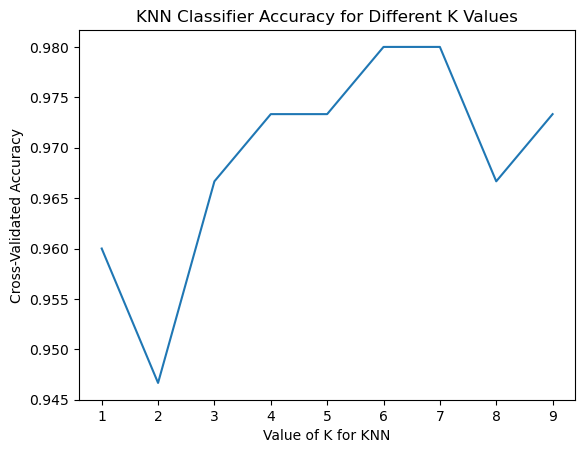

In [106]:

import matplotlib.pyplot as plt

plt.plot(k_val,score)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('KNN Classifier Accuracy for Different K Values')
plt.show()

## Q5. Write a Python code snippet to implement the KNN classifier algorithm with weighted voting on
# load_iris dataset in sklearn.datasets.

In [108]:
from sklearn.datasets import load_iris
data=load_iris()

In [109]:
x=pd.DataFrame(data.data,columns=data.feature_names)
y=data.target

In [110]:
x.shape

(150, 4)

In [111]:
len(y)

150

In [112]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [116]:
clf=KNeighborsClassifier()

In [122]:
from sklearn.preprocessing import StandardScaler
def standardize_features(x_train, x_test):
    scaler = StandardScaler()
    x_train_std = scaler.fit_transform(x_train)
    x_test_std = scaler.transform(x_test)  
    return x_train_std, x_test_std

x_train,x_test=standardize_features(x_train, x_test)

In [124]:
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

ValueError: Found input variables with inconsistent numbers of samples: [106, 120]

In [ ]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

## Q2. Write a Python code to implement the KNN regressor algorithm on load_boston dataset in sklearn.datasets.

In [ ]:
from sklearn.datasets import load_boston

In [ ]:
from sklearn.datasets import fetch_california_housing
data=fetch_california_housing()
x=pd.DataFrame(data.data,columns=data.feature_names)
y=data.target

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.29,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sclaer=StandardScaler()
x_train=sclaer.fit_transform(x_train)
x_test=sclaer.transform(x_test)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
reg=KNeighborsRegressor()

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_log_error,r2_score

In [ ]:
print(r2_score(y_test,y_pred)*100)
print(mean_absolute_error(y_test,y_pred))


In [ ]:
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)

## Q7. Write a Python function to calculate the euclidean distance between two points.

In [127]:
def euclidean_distance(x, y):
    ed = np.sqrt(np.sum((x - y) ** 2))
    return ed

In [135]:
x = [1, 2, 3]
y = [4, 5, 6]
distance = euclidean_distance(np.array(x), np.array(6))
print(f"Euclidean distance between {x} and {y}: {distance:.2f}")

Euclidean distance between [1, 2, 3] and [4, 5, 6]: 7.07


# Q8. Write a Python function to calculate the manhattan distance between two points.

In [138]:
def Manhatten_distance(x, y):
    mh = np.abs(np.sum((x - y) ))
    return mh

In [140]:
x = [1, 2, 3]
y = [4, 5, 6]
distance =Manhatten_distance(np.array(x), np.array(6))
print(f"Euclidean distance between {x} and {y}: {distance:.2f}")

Euclidean distance between [1, 2, 3] and [4, 5, 6]: 12.00
